In [27]:
# Тема: Сравнительный анализ пабликов, посвященных достопримечательностям и развлечениям Москвы и Санкт-Петербурга.
# Задачи: 
# 1. Выявить существующие в вк паблики, посвященные достопримечательностям и развлечениям в Москве и Санкт-Петербурге.  
# 2. Выбрать 2 наиболее значимых паблика по Москве и Санкт-Петербургу. 
# 3. Определить распределение по полу и возрасту подписчиков каждого паблика. 
# 3. Определить наиболее распространённые города проживания подписчиков каждого паблика.  
# 4. Сравнить распространённость городов проживания подписчиков пабликов. 
# 6. Выявить наличие и количество людей, состоящих в обоих пабликах.  
# 7. Определить, жители каких городов являются подписчиками обоих пабликов. 
# 8. Выявить наиболее часто встречающиеся в постах пабликов достопримечательности и их пересечения. 

In [341]:
!pip install vk

In [342]:
import vk
import json

In [343]:
token = ""  
session = vk.Session(access_token=token)  
vk_api = vk.API(session)  

In [344]:
personal_token = "" 
session = vk.Session(access_token=personal_token)  
vk_personal_api = vk.API(session) 

In [7]:
# Ищем паблики, посвященные развлечениям и интересным местам Москвы и Санкт-Петербурга, используя различные ключевые слова.

In [8]:
def get_groups(query):
    first = vk_personal_api.groups.search(q=query, count=1000, type="group", v=5.124) 
    data = first["items"]  
    count = first["count"] 
    return [(i['name'], i['id']) for i in data]

In [84]:
# Сначала ищем паблики по Москве:

groups_msk1 = get_groups ("Куда пойти в Москве")
groups_msk2 = get_groups ("Интересные места Москвы")
groups_msk3 = get_groups ("Экскурсии по Москве")
groups_msk4 = get_groups ("События в Москве")


In [85]:
all_groups_msk = set (groups_msk1 + groups_msk2 + groups_msk3 + groups_msk4)
len (all_groups_msk)

218

In [86]:
# Далее находим схожие паблики по Питеру:

groups_spb1 = get_groups ("Куда пойти в Питере")
groups_spb2 = get_groups ("Интересные места Питера")
groups_spb3 = get_groups ("Экскурсии по Питеру")
groups_spb4 = get_groups ("События в Питере")

In [87]:
all_groups_spb = set (groups_spb1 + groups_spb2 + groups_spb3 + groups_spb4)
len (all_groups_spb)


602

In [88]:
def save_groups_to_file (filename, groups):
    with open(filename, 'w', encoding="utf-8") as f:
        for group_name, group_id in groups:
            f.write(f"{group_name}\t{group_id}\n")

In [89]:
save_groups_to_file ("saved_groups_msk.tsv", all_groups_msk)

In [90]:
save_groups_to_file ("saved_groups_spb.tsv", all_groups_spb)

In [57]:
# Начинаем работать с конкретными пабликами. Выбираем для исследования популярные паблики "KudaGo: Москва" и "KudaGo: Санкт-Петербург", поскольку это гарантирует наиболее схожую тематику и формат, что позволяет выявить более точные и полные закономерности.

In [40]:
def get_members(groupid, fields=('sex', 'bdate', 'city', 'country', 'domain')):
    first = vk_api.groups.getMembers(group_id=groupid, fields=fields, v=5.92)  
    data = first["items"]  
    count = first["count"] // 1000  
    for i in range(1, count+1):  
        data = data + vk_api.groups.getMembers(group_id=groupid, fields=fields, v=5.92, offset=i*1000)["items"]
    return data

In [41]:
members_msk = get_members ("kudago")

In [42]:
len (members_msk)

1074738

In [43]:
members_spb = get_members ("kudagospb")

In [44]:
len (members_spb)

650417

In [45]:
def save_members_to_file(filename, members):
    with open(filename, 'w', encoding='utf-8') as f:
        for member in members:
            _id = member["id"] 
            first_name = member["first_name"] 
            last_name = member["last_name"] 
            
            sex = member["sex"] 
            if int(sex) == 1:   
                sex = "F"  
            elif int(sex) == 2:  
                sex = "M" 
            else:  
                sex = "-"  
                
            bdate = member.get('bdate', "-")   
            if len(bdate.split(".")) == 3:  
                bdate = bdate.split(".")[-1]  
            else:  
                bdate = "-"  
                
            city = member.get('city', {}).get("title", "-")  
            country = member.get('country', {}).get("title", "-")  
            f.write(f"{_id},\t{first_name}\t{last_name}\t{sex}\t{bdate}\t{city}\t{country}\n")  

In [46]:
save_members_to_file ("saved_members_msk.tsv", members_msk)

In [47]:
save_members_to_file ("saved_members_spb.tsv", members_spb)

In [48]:
# Создаём графики по различным параметрам подписчиков (возраст, город проживания) для обоих пабликов.

In [162]:
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
import pandas as pd
df_msk = pd.read_csv("saved_members_msk.tsv", sep="\t", names=["id", "name", "surname", "sex", "birth", "city", "country"])
df_spb = pd.read_csv("saved_members_spb.tsv", sep="\t", names=["id", "name", "surname", "sex", "birth", "city", "country"])

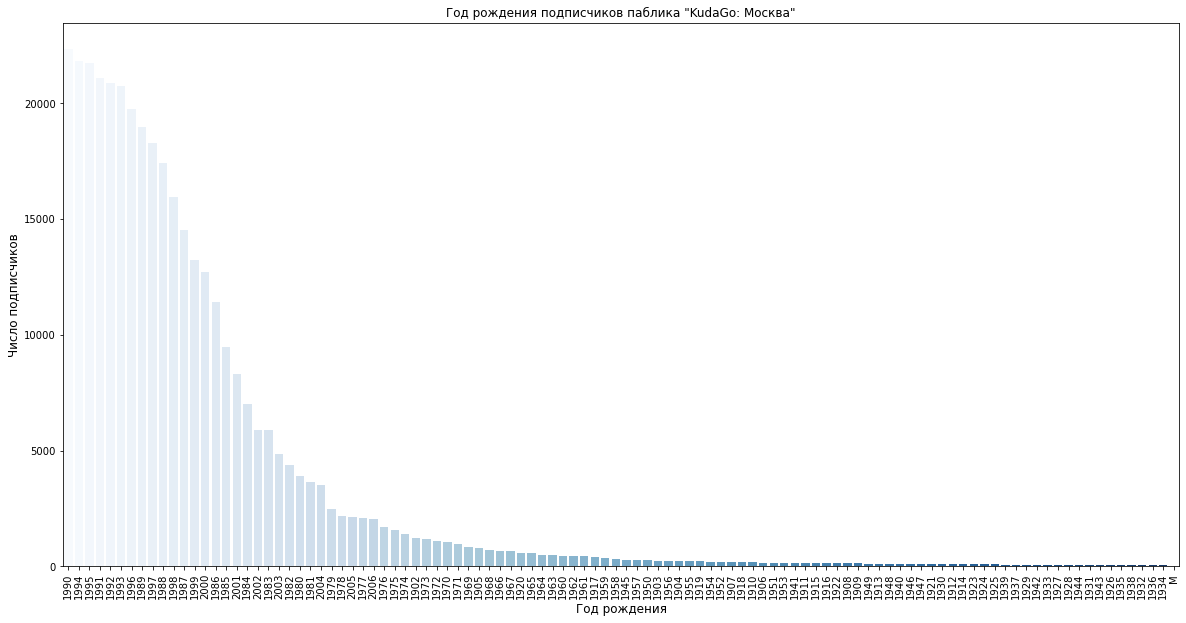

In [442]:
# Посмотрим средний возраст подписчиков "KudaGo: Москва"

birth_count_msk = df_msk['birth'].value_counts().drop('-')
plt.figure(figsize=(20,10))
ax = sns.barplot(birth_count_msk.index, birth_count_msk.values, palette='Blues') 
plt.title('Год рождения подписчиков паблика "KudaGo: Москва"')
plt.ylabel('Число подписчиков', fontsize=12)
plt.xlabel('Год рождения', fontsize=12)
plt.xticks(rotation=90)  
plt.savefig ("birth_count_msk.png", dpi=1000)

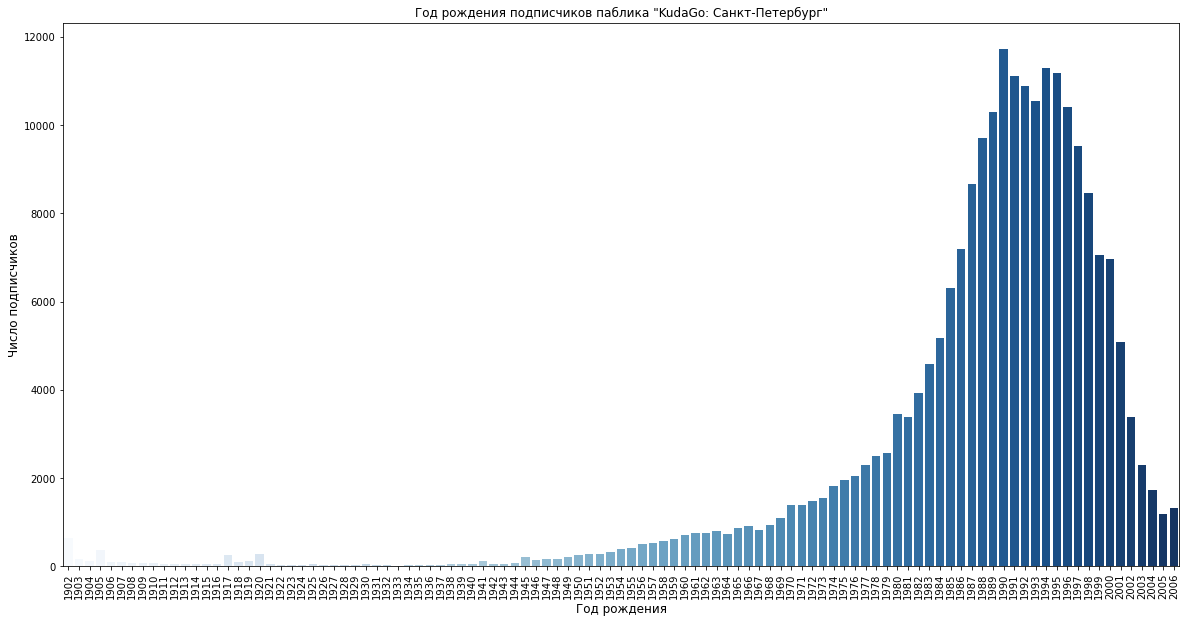

In [443]:
# Посмотрим средний возраст подписчиков "KudaGo: Санкт-Петербург"
birth_count_spb = df_spb['birth'].value_counts().drop('-')
plt.figure(figsize=(20,10))
ax = sns.barplot(birth_count_spb.index, birth_count_spb.values, palette='Blues') 
plt.title('Год рождения подписчиков паблика "KudaGo: Санкт-Петербург"')
plt.ylabel('Число подписчиков', fontsize=12)
plt.xlabel('Год рождения', fontsize=12)
plt.xticks(rotation=90)  
plt.savefig ("birth_count_spb.png", dpi=1000)


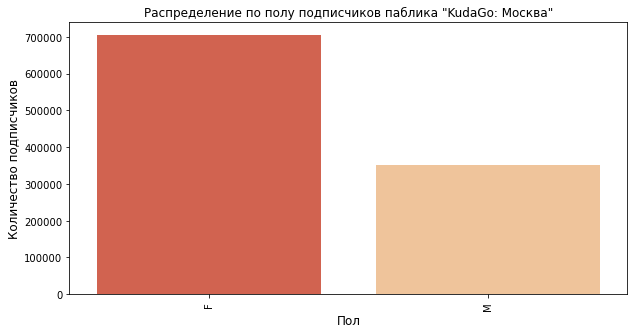

In [456]:
# Посмотрим распределение подписчиков "KudaGo: Москва" по полу

plt.figure(figsize=(10, 5))
sex_count_msk  = df_msk['sex'].value_counts().drop('-') 
sex_count_msk = sex_count_msk[:2]
sex_count_msk.plot.bar()
sns.barplot(sex_count_msk.index, sex_count_msk.values, palette='OrRd_r') 
plt.title('Распределение по полу подписчиков паблика "KudaGo: Москва"')
plt.ylabel('Количество подписчиков', fontsize=12)
plt.xlabel('Пол', fontsize=12)
plt.xticks(rotation=90) 
plt.savefig ("sex_count_msk.png", dpi=1000)

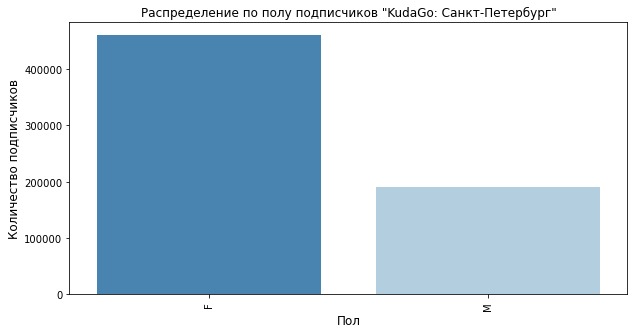

In [455]:
# Посмотрим распределение подписчиков "KudaGo: Санкт-Петербург" по полу

plt.figure(figsize=(10, 5))
sex_count_spb  = df_spb['sex'].value_counts().drop('-') 
sex_count_spb.plot.bar()
sns.barplot(sex_count_spb.index, sex_count_spb.values, palette='Blues_r') 
plt.title('Распределение по полу подписчиков "KudaGo: Санкт-Петербург"')
plt.ylabel('Количество подписчиков', fontsize=12)
plt.xlabel('Пол', fontsize=12)
plt.xticks(rotation=90) 
plt.savefig ("sex_count_spb.png", dpi=1000)

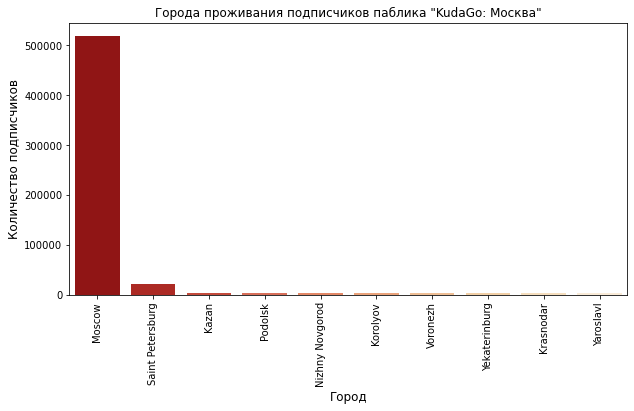

In [177]:
# Посмотрим, из каких городов подписчики паблика "KudaGo: Москва"
plt.figure(figsize=(10, 5))
city_count_msk  = df_msk['city'].value_counts().drop('-') 
city_count_msk = city_count_msk[:10]
city_count_msk.plot.bar()
sns.barplot(city_count_msk.index, city_count_msk.values, palette='OrRd_r') 
plt.title('Города проживания подписчиков паблика "KudaGo: Москва"')
plt.ylabel('Количество подписчиков', fontsize=12)
plt.xlabel('Город', fontsize=12)
plt.xticks(rotation=90) 
plt.savefig ("city_count_msk.png", dpi=1000)

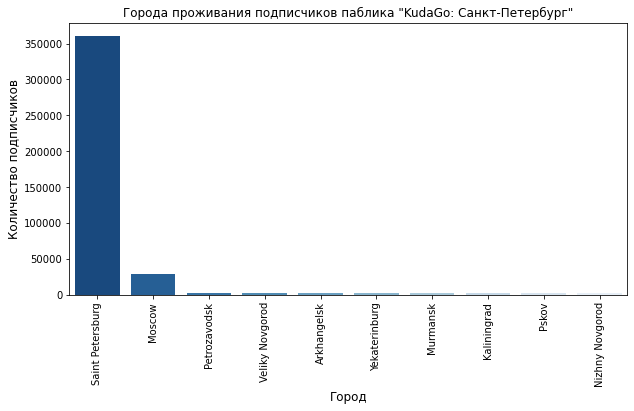

In [178]:
# Посмотрим, из каких городов подписчики паблика "KudaGo: Санкт-Петербург"
plt.figure(figsize=(10, 5))
city_count_spb  = df_spb['city'].value_counts().drop('-') 
city_count_spb = city_count_spb[:10]
city_count_spb.plot.bar()
sns.barplot(city_count_spb.index, city_count_spb.values, palette='Blues_r') 
plt.title('Города проживания подписчиков паблика "KudaGo: Санкт-Петербург"')
plt.ylabel('Количество подписчиков', fontsize=12)
plt.xlabel('Город', fontsize=12)
plt.xticks(rotation=90) 
plt.savefig ("city_count_spb.png", dpi=1000)

In [67]:
# Посмотрим, сколько общих участников и из каких они городов

with open ("saved_members_msk.tsv", 'r', encoding='utf-8') as f:
    members_msk_1 = f.read().split("\n")

with open ("saved_members_spb.tsv", 'r', encoding='utf-8') as f:
    members_spb_1 = f.read().split("\n")

In [69]:
members_msk_1 = set (members_msk_1)
members_spb_1 = set (members_spb_1)

In [70]:
intersected_members = members_msk_1.intersection (members_spb_1)

In [71]:
len (intersected_members)

54692

In [72]:
with open ("intersected.tsv", "w", encoding= 'utf-8') as w:
    for i in intersected_members:
        w.write (i+"\n")

In [73]:
df_inter = pd.read_csv("intersected.tsv", sep="\t", names=["id", "name", "surname", "sex", "birth", "city", "country"])

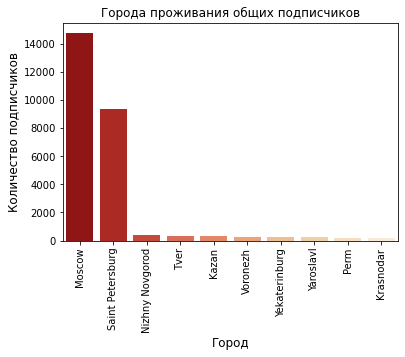

In [181]:
city_count_inter  = df_inter['city'].value_counts().drop('-') "-"
city_count_inter = city_count_inter[:10]
city_count_inter.plot.bar()
sns.barplot(city_count_inter.index, city_count_inter.values, palette='OrRd_r') 
plt.title('Города проживания общих подписчиков')
plt.ylabel('Количество подписчиков', fontsize=12)
plt.xlabel('Город', fontsize=12)
plt.xticks(rotation=90) 
plt.savefig ("city_count_inter.png", dpi=1000)

In [533]:
# Выгружаем посты обоих пабликов

def get_posts (owner_id):
    first = vk_api.wall.get (domain = owner_id, count=100, filter="owner", v=5.124)
    data = first["items"]  
    count = first["count"] // 100 
    for i in range(1, count+1):  
        data += vk_api.wall.get(domain = owner_id, v=5.124, filter="owner", count=100, offset=i*100)["items"]
        if i == 250:
            break
    return [i['text'] for i in data]

In [534]:
posts_msk = get_posts ("kudago")

In [536]:
posts_spb = get_posts ("kudagospb")

In [535]:
len (posts_msk)

25100

In [537]:
len (posts_spb)

25100

In [477]:
# Начинаем обработку и лемматизацию текста постов

In [595]:
import re

In [596]:
pattern_link = re.compile (r"[\S]+[\.\/]+[\S]+") 

In [597]:
pattern_mention = re.compile (r"\(?\[.+?\]\)?")

In [598]:
def delete_newlines (text):
    text = text.replace("\n", " ")
    return text

In [599]:
posts_msk = [delete_newlines(post) for post in posts_msk]
posts_spb = [delete_newlines(post) for post in posts_spb]

In [600]:
print (posts_msk [-10:])

['Перед футбольным матчем клубов «Локомотив» и «Урал» 23 ноября зрителей ждет развлекательная программа для всей семьи и выступление Дмитрия Маликова   https://kudago.com/go/v9rzz/', 'Розыгрыш билетов на концерт SunSay 16+  Традиционный согревающий зимний вечер в компании ведущих специалистов по фанк-фьюжну в клубе «16 тонн»!  Подробнее о концерте: https://kudago.com/go/pzymu/  Сегодня премьера клипа на песню «Песня Земли». Это большой проект SunSay совместно с фондом защиты дикой природы WWF о ценности нашей планеты, природы и единства людей. Смотрите клип и принимайте участие в розыгрыше!   Что требуется для участия в конкурсе:  1. Быть подписчиком нашего паблика [club37119411|KudaGo: Москва]  2. Принять участие в опросе и дать правильный ответ!  6 декабря в 16:00 всем участникам опроса придет уведомление о завершении опроса, в комментариях мы огласим правильный ответ. Из тех, кто верно угадал, мы рандомно выберем победителя. Удачи!  #розыгрыш@kudago', '«Ховрино» закроют из-за присое

In [601]:
def replace_weblinks(text):
    return re.sub(pattern_link, "WEBLINK", text)

In [602]:
posts_msk = [replace_weblinks(post) for post in posts_msk]
posts_spb = [replace_weblinks(post) for post in posts_spb]

In [603]:
print (posts_msk [-10:])

['Перед футбольным матчем клубов «Локомотив» и «Урал» 23 ноября зрителей ждет развлекательная программа для всей семьи и выступление Дмитрия Маликова   WEBLINK', 'Розыгрыш билетов на концерт SunSay 16+  Традиционный согревающий зимний вечер в компании ведущих специалистов по фанк-фьюжну в клубе «16 тонн»!  Подробнее о концерте: WEBLINK  Сегодня премьера клипа на песню «Песня Земли». Это большой проект SunSay совместно с фондом защиты дикой природы WWF о ценности нашей планеты, природы и единства людей. Смотрите клип и принимайте участие в розыгрыше!   Что требуется для участия в конкурсе:  1. Быть подписчиком нашего паблика [club37119411|KudaGo: Москва]  2. Принять участие в опросе и дать правильный ответ!  6 декабря в 16:00 всем участникам опроса придет уведомление о завершении опроса, в комментариях мы огласим правильный ответ. Из тех, кто верно угадал, мы рандомно выберем победителя. Удачи!  #розыгрыш@kudago', '«Ховрино» закроют из-за присоединения новой станции  Пассажиров довезут 

In [604]:
def replace_mentions(text):
    return re.sub(pattern_mention, "MENTION", text)

In [605]:
posts_msk = [replace_mentions(post) for post in posts_msk]
posts_spb = [replace_mentions(post) for post in posts_spb]

In [606]:
print (posts_msk [-10:])

['Перед футбольным матчем клубов «Локомотив» и «Урал» 23 ноября зрителей ждет развлекательная программа для всей семьи и выступление Дмитрия Маликова   WEBLINK', 'Розыгрыш билетов на концерт SunSay 16+  Традиционный согревающий зимний вечер в компании ведущих специалистов по фанк-фьюжну в клубе «16 тонн»!  Подробнее о концерте: WEBLINK  Сегодня премьера клипа на песню «Песня Земли». Это большой проект SunSay совместно с фондом защиты дикой природы WWF о ценности нашей планеты, природы и единства людей. Смотрите клип и принимайте участие в розыгрыше!   Что требуется для участия в конкурсе:  1. Быть подписчиком нашего паблика MENTION  2. Принять участие в опросе и дать правильный ответ!  6 декабря в 16:00 всем участникам опроса придет уведомление о завершении опроса, в комментариях мы огласим правильный ответ. Из тех, кто верно угадал, мы рандомно выберем победителя. Удачи!  #розыгрыш@kudago', '«Ховрино» закроют из-за присоединения новой станции  Пассажиров довезут на автобусах  WEBLINK'

In [607]:
with open ("posts_msk.txt", 'w', encoding="utf-8") as f:
    for post in posts_msk:
        f.write (post+"\n")

In [608]:
with open ("posts_spb.txt", 'w', encoding="utf-8") as f:
    for post in posts_spb:
        f.write (post+"\n")

In [609]:
from nltk.tokenize import word_tokenize
from collections import Counter
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/mac/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [610]:
with open("posts_msk.txt", 'r', encoding='utf-8') as f:
    posts_msk = f.read().lower()

In [611]:
with open("posts_spb.txt", 'r', encoding='utf-8') as f:
    posts_spb = f.read().lower()

In [612]:
words_msk = word_tokenize(posts_msk)
len (words_msk)

492830

In [613]:
words_spb = word_tokenize(posts_spb)
len (words_spb)

516589

In [614]:
words_msk = [i for i in words_msk if i.isalnum()]
len (words_msk)

414757

In [615]:
words_spb = [i for i in words_spb if i.isalnum()]
len (words_spb)

429124

In [616]:
with open("stopwords_russian.txt", 'r', encoding="utf-8") as f:
    stop_words = f.read().lower().split("\n")
    stop_words = set(stop_words)

In [617]:
clean_words_msk = [word for word in words_msk if word not in stop_words]

In [618]:
clean_words_spb = [word for word in words_spb if word not in stop_words]

In [448]:
print (clean_words_msk [:50])

['экватором', 'октября', 'музыкальные', 'события', 'новой', 'недели', 'weblink', 'учёные', 'определили', 'страшный', 'фильм', 'научной', 'точки', 'зрения', 'weblink', 'усадьба', 'кусково', 'автор', 'фото', 'tanyameetsworld', 'первом', 'концерте', 'карантина', 'хлеб', 'намерены', 'ударить', 'фанатам', 'самыми', 'яркими', 'хитами', 'трёх', 'альбомов', 'weblink', 'учёные', 'pэу', 'имени', 'плexaновa', 'спрогнозировали', 'poccия', 'пройдёт', 'пик', 'начале', 'ноября', 'coronavirus', 'коронавирус', 'искусств', 'уходит', 'онлайн', 'weblink', 'рамках']


In [449]:
print (clean_words_spb [:50]) 

['концерт', 'дельфина', 'рождения', 'анненкирхе', '18', 'событий', 'осеннего', 'экватора', 'weblink', 'памятник', 'бременским', 'музыкантам', 'ресторана', 'карл', 'фридрих', 'крестовском', 'праздничные', 'дни', 'гулять', 'круглосуточно', 'субботу', 'воскресенье', 'ночью', 'петербург', 'рисунках', 'новая', 'масштабная', 'площадка', 'лазертага', 'игр', 'виртуальной', 'реальности', 'играть', 'центре', 'виртуальной', 'реальности', 'взрослые', 'дети', 'первые', 'дни', 'работы', 'игровой', 'арены', 'действует', 'специальный', 'выгодный', 'тариф', 'центр', 'дарит', 'скидку']


In [636]:
Counter(clean_words_msk).most_common(30)

[('weblink', 20287),
 ('фото', 2869),
 ('автор', 2862),
 ('москве', 2719),
 ('kudago', 2708),
 ('москвы', 1680),
 ('прогород', 777),
 ('места', 648),
 ('лучшие', 606),
 ('афиша', 598),
 ('пройдёт', 543),
 ('самые', 524),
 ('россии', 521),
 ('фестиваль', 520),
 ('недели', 510),
 ('шоу', 502),
 ('самых', 495),
 ('лекции', 495),
 ('главные', 491),
 ('хотите', 488),
 ('приходите', 477),
 ('рассказываем', 448),
 ('приглашает', 445),
 ('события', 440),
 ('бесплатно', 431),
 ('выставки', 427),
 ('концерты', 425),
 ('мест', 421),
 ('концерт', 416),
 ('20', 397)]

In [637]:
Counter(clean_words_spb).most_common(30)

[('weblink', 17455),
 ('kudagospb', 2358),
 ('петербурге', 2315),
 ('петербурга', 1552),
 ('рассказываем', 943),
 ('фото', 908),
 ('стоит', 842),
 ('пройдёт', 768),
 ('афиша', 760),
 ('петербург', 757),
 ('фестиваль', 656),
 ('места', 554),
 ('самые', 502),
 ('новости', 500),
 ('недели', 490),
 ('россии', 484),
 ('города', 478),
 ('хотите', 463),
 ('шоу', 461),
 ('лучшие', 444),
 ('самых', 415),
 ('события', 402),
 ('сходить', 393),
 ('kudago', 390),
 ('выходные', 389),
 ('билеты', 387),
 ('выставки', 387),
 ('выходных', 380),
 ('центре', 374),
 ('20', 367)]

In [621]:
!pip install pymystem3
from pymystem3 import Mystem
def lemmatized_text (text):
    m = Mystem ()
    lemmas = m.lemmatize(text)
    return lemmas[0]

In [623]:
lemmatized_words_msk = []
for word in clean_words_msk:
    lemmatized_words_msk.append(lemmatized_text (word))


KeyboardInterrupt: 

In [ ]:
lemmatized_words_spb = []
for word in clean_words_spb:
    lemmatized_words_spb.append(lemmatized_text (word))

In [255]:
lemmatized_words_msk = set (lemmatized_words_msk)
lemmatized_words_msk
with open ("lemmatized_words_msk.txt", 'w', encoding="utf-8") as f:
    for word in lemmatized_words_msk:
        f.write (word +"\n")

In [256]:
lemmatized_words_spb = set (lemmatized_words_spb)
lemmatized_words_spb
with open ("lemmatized_words_spb.txt", 'w', encoding="utf-8") as f:
    for word in lemmatized_words_spb:
        f.write (word +"\n")

In [258]:
lemmatized_words_msk.intersection(lemmatized_words_spb)
with open ("lemmatized_words_intersection.txt", 'w', encoding="utf-8") as f:
    for word in lemmatized_words_msk.intersection(lemmatized_words_spb):
        f.write (word +"\n")

In [540]:
!pip install natasha

In [541]:
from natasha import (Segmenter, MorphVocab, NewsEmbedding, 
NewsMorphTagger, NewsSyntaxParser, NewsNERTagger, PER, NamesExtractor, Doc)

In [542]:
segmenter = Segmenter()
morph_vocab = MorphVocab()
emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
syntax_parser = NewsSyntaxParser(emb)
ner_tagger = NewsNERTagger(emb)
names_extractor = NamesExtractor(morph_vocab)

In [584]:
locations_msk = set()
persons_msk = set()
organizations_msk = set()

with open("posts_msk.txt", 'r', encoding="utf-8") as f:
    for line in f:
        text = line.strip()
        
        doc = Doc(text)
        doc.segment(segmenter)
        doc.tag_morph(morph_tagger)
        doc.tag_ner(ner_tagger)
        
        for span in doc.spans:
            span.normalize(morph_vocab)
        
            if span.type == 'LOC':
                locations_msk.add(span.normal)
            
            elif span.type == 'PER':
                persons_msk.add(span.normal)
            
            elif span.type == 'ORG':
                organizations_msk.add(span.normal)

In [585]:
print ("Локации МСК: ", len (locations_msk), "локации", locations_msk)

Локации МСК:  282 локации {'Российская империя', 'Дорогомилово', 'Амазонка', 'Бельгия', 'Нижний Новгород', 'Бали', 'Хогвартс-Экспресс', 'Узкое', 'Калязин', 'Архангельск', 'Покровки', 'Старый Арбат', 'Цемгигант', 'Остафьево', 'Путешественникам', 'Арбат', 'WEBLINK', 'Швейцария', 'Луна', 'Арка', 'Зарядье', 'Музеон', 'Южный Урал', 'Соколово-Мещерской', 'Подкопаевский переулок', 'Караоке-клуб', 'Запад', 'Воскресенск', 'Финляндия', 'Якиманская', 'Наска', 'Италия', 'Кремлевская стена', 'Беларусь', 'Троицкое', 'Пилот', 'Коптевской', 'Тверская', 'Куркино ⛩    Новый участок', 'Эмираты', 'Старосадский переулок', 'Камчатка', 'Ильинский пляж', 'Германия', 'Старый', 'Монино', 'Брейтовский район', 'Васильевский остров', 'Серпуховке', 'Белоснежкой', 'Таганский район', 'Частичка Древняя Япония', 'Колымский тракт', 'Можайское водохранилище', 'Пятницкая', 'Измайлово', 'Восток', 'Таганско-Краснопресненской', 'Лондон', 'Подробности', 'Строгино', 'Никола-Ленивец', 'Хамовники', 'Патриот', 'Фили', 'Россияне',

In [586]:
with open ("locations_msk.txt", 'w', encoding="utf-8") as f:
    for word in locations_msk:
        f.write (word +"\n")

In [555]:
print ("Персоны МСК: ", len (persons_msk), "персон", persons_msk)

Персоны МСК:  329 персон {'Касаткина', 'Мендельсон', 'Дорн', 'Андрей Рублев', 'Михаил Шац', 'Джеймс Макэвой', 'Саксофон', 'Данте', 'Филипп Воронин', 'Мария Сергеева', 'Цай Минлян', 'Место', 'Константин Агальцов', 'Мунк', 'Бах', 'Сестра Рэтчед', 'Дворы-колодцы', 'Александр Листратов', 'Георгий', 'Леонид Гайдай  WEBLINK', 'Владимир Пресняков–младший', 'Ван Гог', 'Мигель', 'Елена Резановой', 'Баканаль дель Ньокко', 'Маппетов', 'Леонид Агутин', 'Маша', 'Ольга Муравиной', 'де Гриньи', 'При', 'Экскурсия', 'Константин Михайлов', 'Поднимайтесь', 'Столыпин', 'Идрак Мирзализаде', 'Сергей Мазаев', 'Дипанкер Хосла', 'Бальбоа', 'Слава Комиссаренко', 'да Кабесон', 'Кристи Пую  WEBLINK', 'Молодежный Экофестиваль', 'Николай Гоголь', 'Руслан Мухтаров  WEBLINK', 'Роберт Паттинсон', 'Иоганн Себастьян Бах  WEBLINK', 'Александр Петров', 'Успейте', 'Евгения Зима', 'Артур Аристакисян', 'Гарри Поттер', 'Дориан Грей', 'Дима Клейман', 'Валерий Меладзе', 'Жан-Поле Сартр', 'Практикуете', 'Врач-иммунолог', 'Игорь

In [578]:
with open ("persons_msk.txt", 'w', encoding="utf-8") as f:
    for word in persons_msk:
        f.write (word +"\n")

In [553]:
print ("Организации МСК:", len (organizations_msk), "организация", organizations_msk)

Организации МСК: 441 организация {'ВелоДрайв', 'Рондо', 'Мафия', '2Unlimited', 'Музей ВВС', 'Мавзолей Ленин', 'Среди преподаватели', 'Игла', 'Театр на Соборная', 'Росавиация', 'METRO', 'Театр мюзикл', 'Ассоциация любители кошки', 'СТС', 'мхат имя Горький  Героиня', 'мхат имя Горький  WEBLINK', 'Purina', 'ТАНЦЫ', 'Uteens', 'Спорт-Марафон', 'СОVID-19', 'Музей Like Room', 'ТНТ', 'Sisters', 'Театриума', 'Scooter', 'Парк Патриот', 'PANORAMA', 'S7', 'Измайловский Кремль', 'Библиотеки', 'Alpaca Wellbeing Fest', 'Театр кошки Куклачев', 'ВДНХ', 'Wall Street English', 'Музей мертвые куклы', 'Школа', 'Москва-Сити', 'Мультсериал', 'КиноПоиск HD  Подробнее', 'ФАС', 'Thomas Mraz', 'Rolling Stones', 'Fantomas Chateau & Rooftop', 'АртДинамикс', 'тюз', 'Эксмо', 'Кафедральный собор святые Петр и Павел солисты', 'Moreevents  WEBLINK', 'Подмосковный Версаль', 'Посольство', 'Международная Академия KEUNE DESIGN', 'Владимирская школа  WEBLINK', 'Instagram', 'Дептранс', 'МГУ имя WEBLINK', 'Москва Комус Fest',

In [579]:
with open ("organizations_msk.txt", 'w', encoding="utf-8") as f:
    for word in organizations_msk:
        f.write (word +"\n")

In [556]:
locations_spb = set()
persons_spb = set()
organizations_spb = set()

with open("posts_spb.txt", 'r', encoding="utf-8") as f:
    for line in f:
        text = line.strip()
        
        doc = Doc(text)
        doc.segment(segmenter)
        doc.tag_morph(morph_tagger)
        doc.tag_ner(ner_tagger)
        
        for span in doc.spans:
            span.normalize(morph_vocab)
        
            if span.type == 'LOC':
                locations_spb.add(span.normal)
            
            elif span.type == 'PER':
                persons_spb.add(span.normal)
            
            elif span.type == 'ORG':
                organizations_spb.add(span.normal)

In [557]:
print ("Локации СПБ: ", len (locations_spb), "локаций", locations_spb)

Локации СПБ:  414 {'Салоны Петербург', 'Выборгское шоссе', 'Нева', 'Тосненский водопад', 'Петергоф  Там', 'Ленобласть', 'Октябрьская набережная', 'Лужская губа', 'Смольный', 'Большеохтинский', 'Луна', 'Осень', 'Запад', 'Финляндия', 'Дели', 'Александровский Парк', 'Краснодар', 'Большой Казачий', 'София Коппола', 'Ботанический Сад', 'Зазеркалье Петербург', 'Азия', 'Инсбрук', 'Латвия', 'Трехчасовая автобусно-пешеходная', 'Байкал', 'П', 'Английская набережная', 'Вантовый мост', 'Гренландия', 'Франция', 'Петровская пристань', 'Соединенные Штаты Америка', 'Гатчинский дворец', 'Сескар', 'Парижская Богоматерь', 'Ираклион', 'Елагин остров', 'Ладожское озеро', 'Литейный округ', 'Водопады', 'Малая Конюшенная улица', 'Садовая  Дизайн-маркет', 'Кисловодск', 'Василеостровский', 'Прага', 'Египет', 'Лебяжьей канавке', 'Петропавловск-Камчатский', 'Санкт-Петербург', 'Заячий остров', 'Кавказская губерния', 'Тосненский район', 'Индия', 'Петровский Фарватер', 'Финский залив', 'Всеволожский', 'Лахта', 'Чер

In [580]:
with open ("locations_spb.txt", 'w', encoding="utf-8") as f:
    for word in locations_spb:
        f.write (word +"\n")

In [558]:
print ("Персоны СПБ: ", len (persons_spb), "персон", persons_spb)

Персоны СПБ:  376 {'Шари', 'Вова Че Морале', 'Ксения Раппопорт', 'Бродский  WEBLINK', 'Джеймс Макэвой', 'Мария Сергеева', 'Владимир Маяковский', 'Рамэн', 'Режиссер-постановщик', 'Трубецких-Нарышкиных', 'Рубинштейн  Прогуляемся', 'Дворы-колодцы', 'Мальбэка', 'Валерий Тодоровский', 'Походный', 'Ван Гог', 'Рассел Джеймс', 'Мигель', 'Александр Ситникова', 'Зажигаем', 'Г. Г. Гильзе фан дер Пальса', 'Арр', 'Мирабеллы Карьянова', 'Меладзе', 'Какушкин', 'Чичен-Ица', 'Олег Белозеров', 'Александр Островский', 'Луи Армстронг', 'Маппетов', 'Леонид Агутин', 'Маша', 'Илья Погребняк', 'Грибоедов', 'Никонов', 'Н. В. Гоголь', 'Сильфиду', 'Сергей Рахманинов', 'Фламанда', 'Девятиметровая', 'При', 'Максим Ильяхов', 'Елисеев', 'Фрау Краузе', 'Марина Смургис', 'Фаберже', 'Сергей Васильев', 'Дмитрий Шостакович  WEBLINK', 'Дисней', 'Владимир Волков', 'Дипанкер Хосла', 'Вася Ложкин', 'Эльбрус', 'Александр Грин', 'Любич', 'Лопухиных-Нарышкиных', 'Хайди Клум', 'Теодорос Терзопулоса', 'Марат', 'Ник', 'Фо', 'Дмитр

In [581]:
with open ("persons_spb.txt", 'w', encoding="utf-8") as f:
    for word in persons_spb:
        f.write (word +"\n")

In [560]:
print ("Организации СПБ: ", len (organizations_spb), "организаций", organizations_spb)

Организации СПБ:  588 организаций {'Музей неПравды', 'ВелоДрайв', 'Санкт-Петербургскую Школа программисты', 'Maruwa', 'ТНТ  WEBLINK', 'Jony', 'Смольный', 'Novinky', 'AIR', 'Приморский краеведческий музей', 'Бapтoл', 'Пандоре', 'Всемирная организация здравоохранение', 'Театр на Соборная', 'Росавиация', 'Мы', 'Film Craft', 'Сервис ОnеТwоТriр', 'Колдун', 'JJungleand', 'Деловой Петербург', 'Музей неправда', 'Музей оптика', 'On-the-Go', 'Ленинградский монетный двор', 'ТАНЦЫ', 'Институт кино и телевидение', 'ТРЦ', 'MOSTartmetal', 'Gucci', 'Подписные издания', 'Неоготический Собор Святой Михаил', 'S7 Airlines', 'Artista', 'СОVID-19', 'Вход свободный', 'Ведомости', 'Центр', 'BBQ Shaverma', 'ТНТ', 'WEST 8', 'Nami', 'J&M SHOW', 'Drop The Bass', 'Аррle', 'Театр кошки Куклачев', 'Большой театр  Подробности: WEBLINK', 'Петровский док', 'Лауд', 'Pax', 'Плюшки', 'Невский сверху❤', 'Высочайшая школа экономика', 'Gr', 'Мультсериал', 'Международная Школа Дизайн (IDS-Петербург)', 'Визовый центр', 'Пикник

In [582]:
with open ("organizations_spb.txt", 'w', encoding="utf-8") as f:
    for word in organizations_spb:
        f.write (word +"\n")

In [587]:
set_organizations_msk = set (organizations_msk)
set_locations_msk = set (locations_msk)
set_persons_msk = set (persons_msk)

In [588]:
set_organizations_spb = set (organizations_spb)
set_locations_spb = set (locations_spb)
set_persons_spb = set (persons_spb)

In [589]:
organizations_intersection = set_organizations_msk.intersection(set_organizations_spb)

In [590]:
with open ("organizations_intersection", 'w', encoding="utf-8") as f:
    for word in organizations_intersection:
        f.write (word +"\n")

In [591]:
locations_intersection = set_locations_msk.intersection(set_locations_spb)

In [592]:
with open ("locations_intersection", 'w', encoding="utf-8") as f:
    for word in locations_intersection:
        f.write (word +"\n")

In [593]:
persons_intersection = set_persons_msk.intersection(set_persons_spb)

In [594]:
with open ("persons_intersection", 'w', encoding="utf-8") as f:
    for word in persons_intersection:
        f.write (word +"\n")